# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

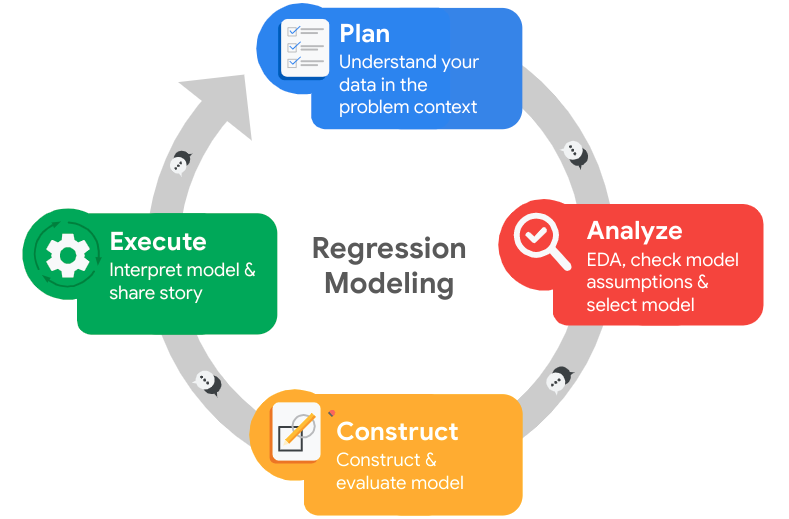



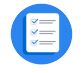

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




<font color=Blue>
1 According to the RACI matrix, my stakeholders could include:<br>
Responsible:<br>
someone in the HR department offering HR related data,<br>
someone in the IT department offering hardware and software services,<br>
myself in charge of modeling, programming, analyzing and summarizing,<br>
someone in the administration department offering management resources.<br>
Accountable:<br>
someone in charge of this project.<br>
Consulted:<br>
some experts in the HR department offering HR related information,<br>
some experts in the LAW department offering law related comments and suggestions,<br>
some senior managers responding to related inquires.<br>
Informed:<br>
a group of senior managers involved in this project.<br>
<br>
2 I am trying to answer the question raised by the HR department: what’s likely to make the employee leave the company?<br>
<br>
3 Current dataset includes employees' performances in the company. Maybe my model can add some personal information such as age, marriage status etc if possible and legal.<br>
<br>
4 I am using the RACI matrix, PACE documents and other knowledge from the courses I have learned.<br>
https://www.coursera.org/learn/foundations-of-data-science/supplement/QjHq0/organize-data-teams-with-a-raci-matrix-part-1<br>
<br>
5 Data of 'average_monthly_hours' may be related to some Workers' Protection Act, and 'salary' is some kind of privacy information.<br>
</font>

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
print(df0.info())
print(df0['left'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
0    11428
1     3571
Name: left, dtype: int64


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.rename(columns={'average_montly_hours':'average_monthly_hours',
                   'Work_accident':'work_accident',
                   'Department':'department',
                   'time_spend_company':'tenure'}, inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

<AxesSubplot: xlabel='tenure'>

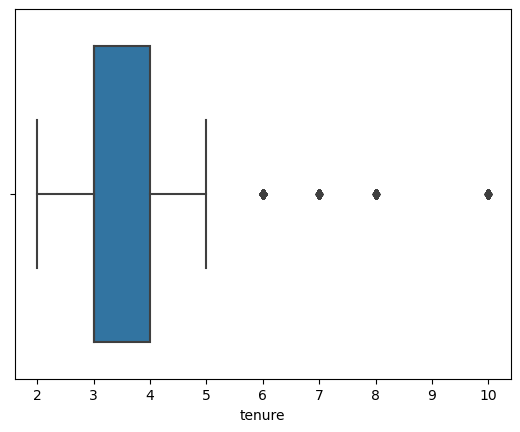

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x='tenure', data=df1)

In [12]:
# Determine the number of rows containing outliers
q1,q3 = df1['tenure'].quantile([0.25,0.75])
iqr = q3-q1
a = q3+iqr*1.5
outliers = (df1['tenure']>a) | (df1['tenure']<0)

df2 = df1[~outliers]
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11167 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11167 non-null  float64
 1   last_evaluation        11167 non-null  float64
 2   number_project         11167 non-null  int64  
 3   average_monthly_hours  11167 non-null  int64  
 4   tenure                 11167 non-null  int64  
 5   work_accident          11167 non-null  int64  
 6   left                   11167 non-null  int64  
 7   promotion_last_5years  11167 non-null  int64  
 8   department             11167 non-null  object 
 9   salary                 11167 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 959.7+ KB
None


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

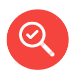
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




<font color=Blue>
1 In this case, the 'target' column is the 'left' one, and all the other columns are grouped into an 'attributes' kind. Hence, I will explore two kinds of relationships: the first one is the relationship between each attributes and the taget, and the second on is the relationships in between each paires of attributes. A most frequently used method to find the relationship between two variables, especially if the target one is a classified label, is to draw distribution plots of an attribute with respect to the different classification labels. If these distribution graphs vary in different classes, it implies this feature has an impact on the final classification results.<br>
<br>
2 The following 3 plots show how the 2 categorical variables and all the other continuous variables distribute grouped by whether they are left or not. It's obvious that turnover rate depends on the 'department', 'salary', 'satisfaction_level', 'last_evaluation', 'number_projects' and 'average_monthly_hours'.<br>
<br>
3 The categorical columns such as 'department' and 'salary' need to be converted to numeric for the machine learning models.<br>
<br>
4 In my opinion, the most important EDA purpose is to find relationships as more as possible.<br>
<br>
5 Some reference documents about Seaborn and statistical description indexes.
https://seaborn.pydata.org/ <br>
<br>
6 I am still concerned about the 'salary' and 'average_monthly_hours'.<br>
</font>

## Step 2. Data Exploration (Continue EDA)

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'IT'),
  Text(1, 0, 'RandD'),
  Text(2, 0, 'accounting'),
  Text(3, 0, 'hr'),
  Text(4, 0, 'management'),
  Text(5, 0, 'marketing'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'sales'),
  Text(8, 0, 'support'),
  Text(9, 0, 'technical')])

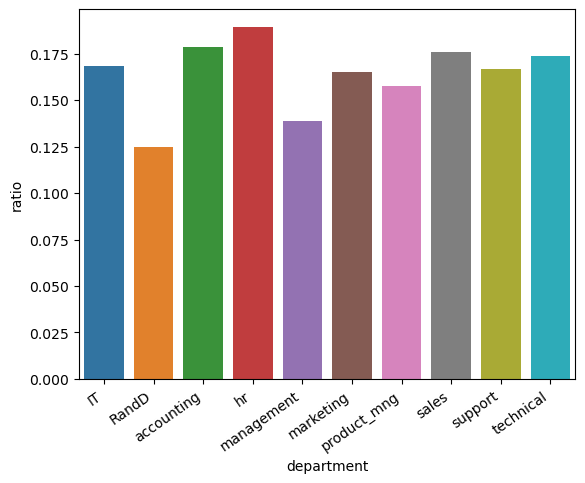

In [13]:
df_depart1 = df2.groupby(['department','left']).size().reset_index()
df_depart1 = df_depart1[df_depart1['left']==1].reset_index()
df_depart1.drop(['left','index'], axis=1, inplace=True)
df_depart1.rename(columns={0:'left'}, inplace=True)

df_depart2 = df2.groupby(['department']).size().reset_index()
df_depart2.rename(columns={0:'total'}, inplace=True)

df_depart = pd.merge(df_depart1,df_depart2)
df_depart['ratio'] = df_depart['left']/df_depart['total']

sns.barplot(x='department',y='ratio',data=df_depart)
plt.xticks(rotation=35, ha='right')

(array([0, 1, 2]),
 [Text(0, 0, 'high'), Text(1, 0, 'low'), Text(2, 0, 'medium')])

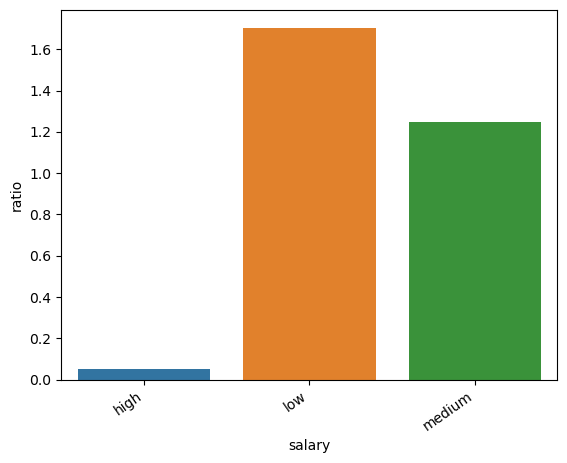

In [14]:
df_s1 = df2.groupby(['salary','left']).size().reset_index()
df_s1 = df_s1[df_s1['left']==1].reset_index()
df_s1.drop(['left','index'], axis=1, inplace=True)
df_s1.rename(columns={0:'left'}, inplace=True)

df_s2 = df2.groupby(['salary']).size().reset_index()
df_s2.rename(columns={0:'total'}, inplace=True)

df_salary = pd.merge(df_s1,df_s2)
df_salary['ratio'] = df_salary['left']/df_depart['total']

sns.barplot(x='salary',y='ratio',data=df_salary)
plt.xticks(rotation=35, ha='right')

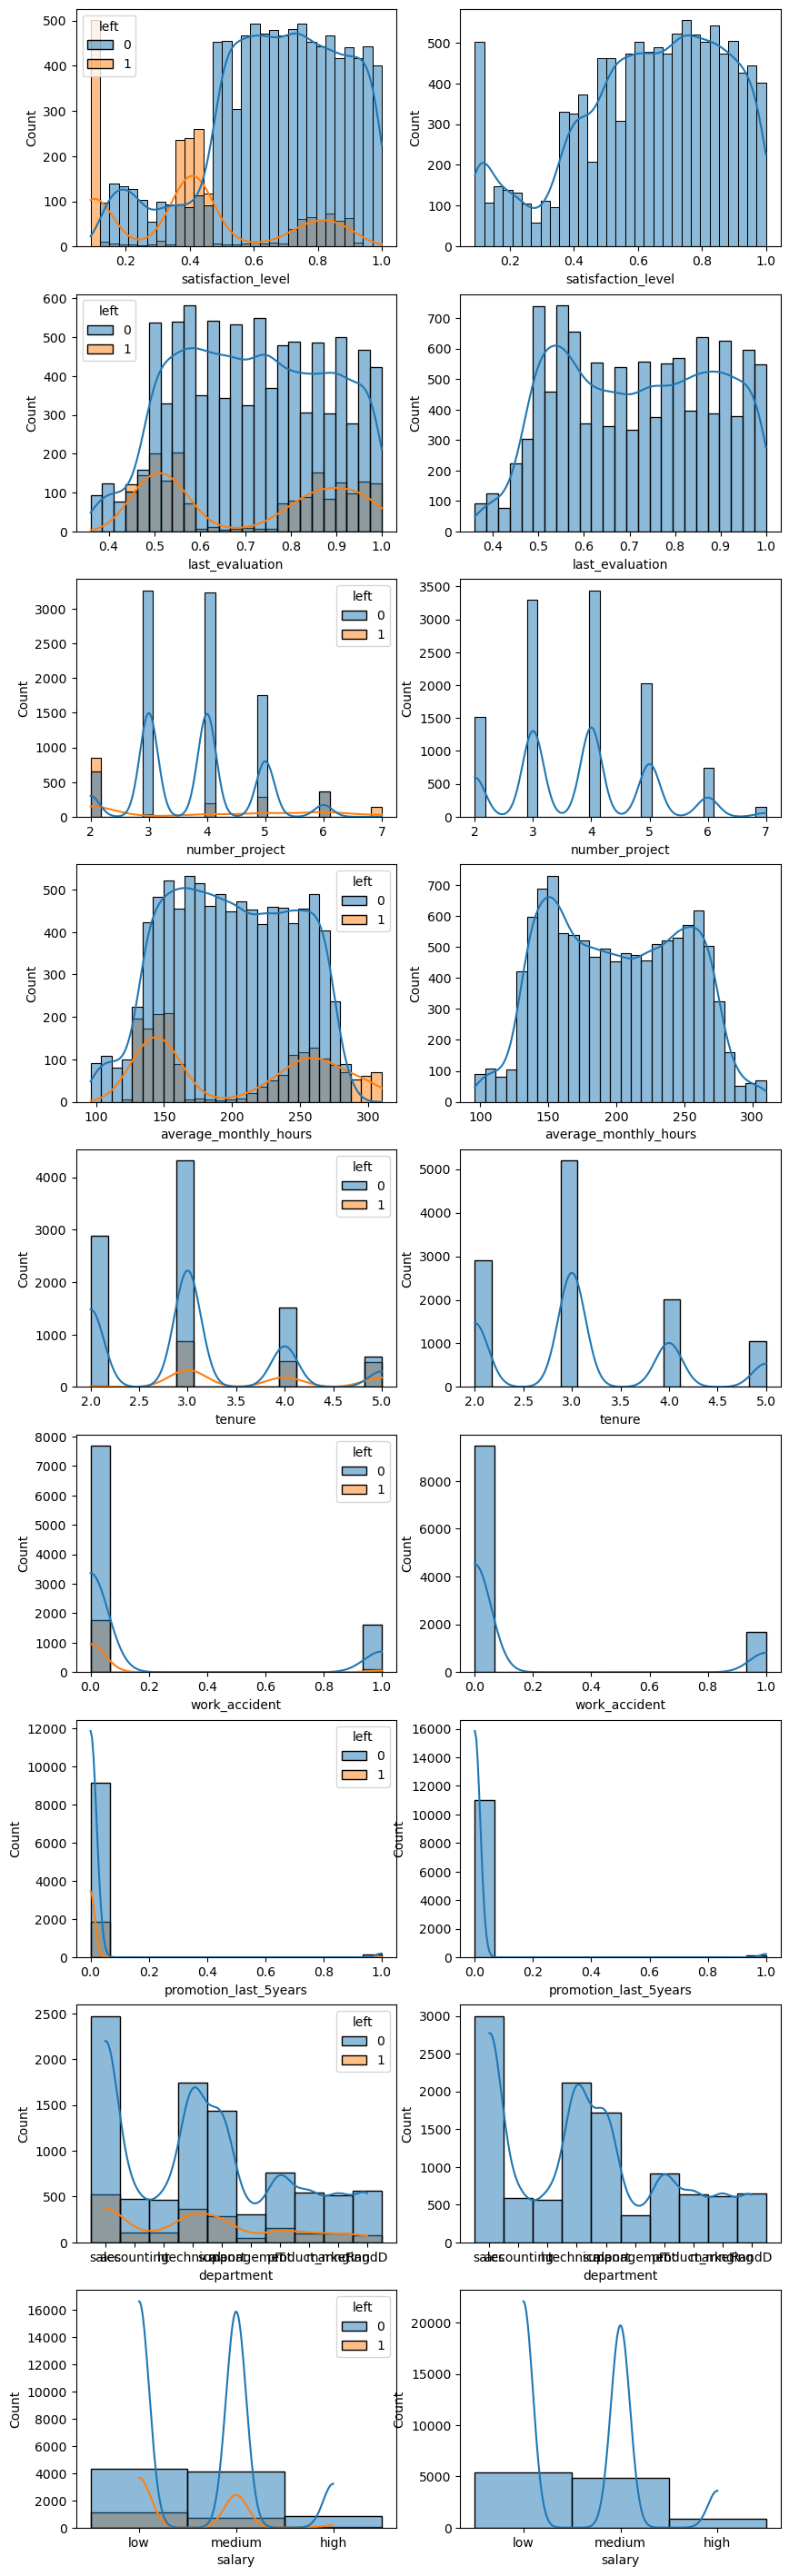

In [15]:
# Create a plot as needed
# to show the distribution of all the columns distributions as a whole or grouped by 'left' labels.
target_col = list(df2.columns)
target_col.pop(target_col.index('left'))
len_targ=len(target_col)

fig,axes = plt.subplots(len_targ,2,figsize=(10,4*len_targ))

for i,name in enumerate(target_col):
    sns.histplot(x=name, data=df2, hue='left', kde=True, ax=axes[i][0])
    sns.histplot(x=name, data=df2, kde=True, ax=axes[i][1])

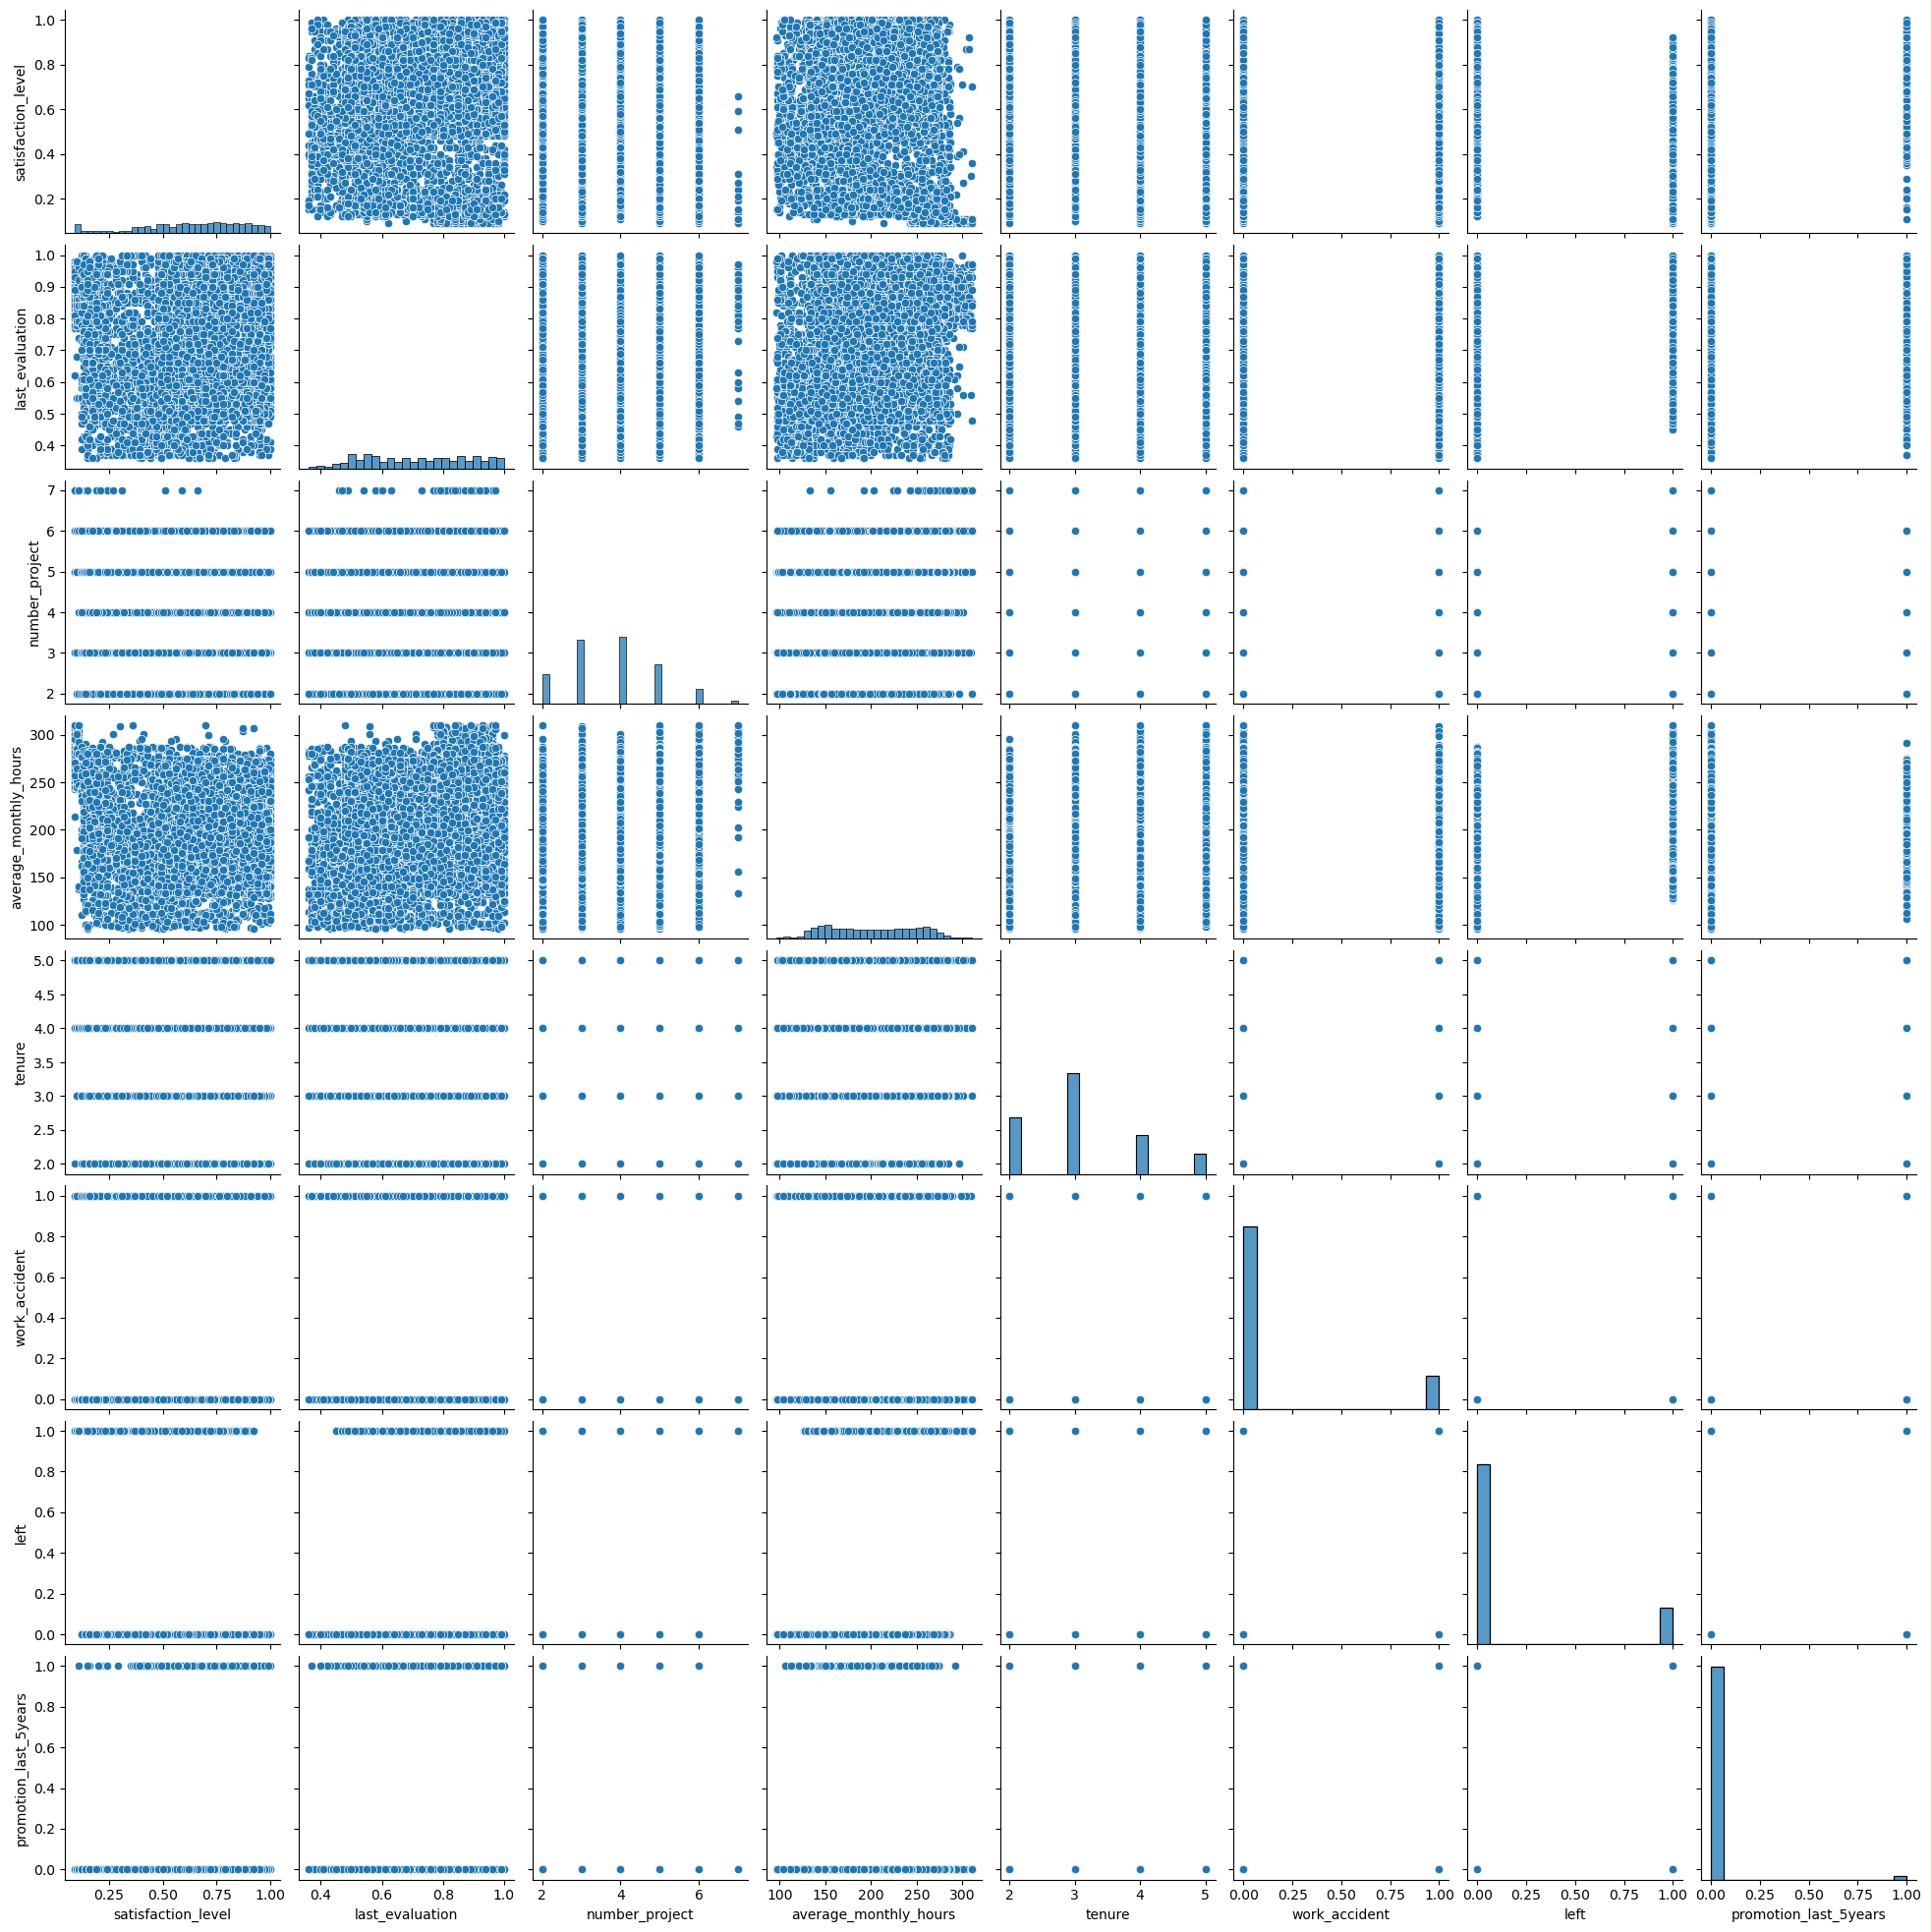

In [16]:
sns.pairplot(data=df2)

In [17]:
df2.corr(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095493,-0.132528,-0.011639,-0.221398,0.044463,-0.400050,0.025885
last_evaluation,0.095493,1.000000,0.280385,0.267207,0.138083,0.001510,-0.013313,-0.001794
number_project,-0.132528,0.280385,1.000000,0.344915,0.257721,-0.004256,0.021499,0.005449
average_monthly_hours,-0.011639,0.267207,0.344915,1.000000,0.145442,-0.007455,0.056267,-0.008760
tenure,-0.221398,0.138083,0.257721,0.145442,1.000000,-0.030974,0.325233,-0.010505
work_accident,0.044463,0.001510,-0.004256,-0.007455,-0.030974,1.000000,-0.123691,0.026046
left,-0.400050,-0.013313,0.021499,0.056267,0.325233,-0.123691,1.000000,-0.038398
promotion_last_5years,0.025885,-0.001794,0.005449,-0.008760,-0.010505,0.026046,-0.038398,1.000000


<AxesSubplot: >

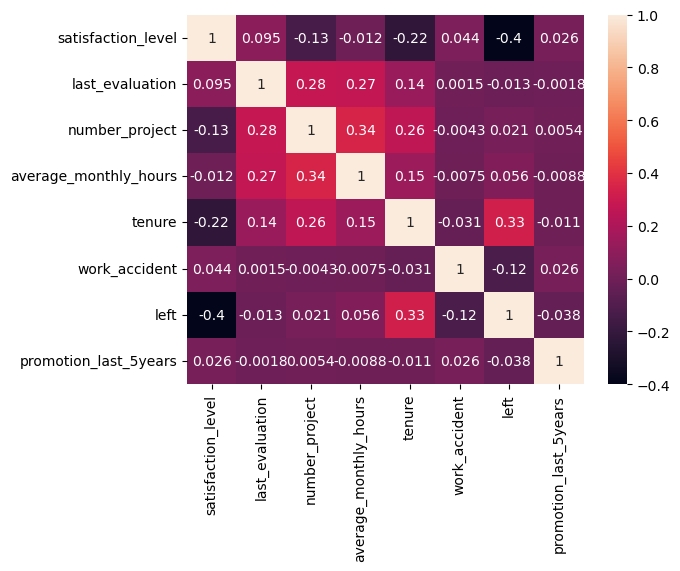

In [18]:
sns.heatmap(data=df2.corr(numeric_only=True),annot=True)

### Insights

<font color=Blue>
Even though columns like 'last_evaluation','number_projects','average_monthly_hours' take correlation coefficents very close to 0, which mean the linear correlation relationships are weak, their different values implies obvious different turnover rates.<br>
<br>
</font>

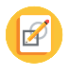
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



<font color=Blue>
1 The logistic model is notable for being outperformed by tree-based models.<br>
As shown in Cell 13-15, the distribution curves for columns are flucuant with several peaks within the observed range. I consider it the main reason why the linear model did not work well here. <br>
<br>        
2 Actually, the volume of the given dataset was not very large. I will try to incorporate all the variables into my models. Then, I will try to make some selections from them based on the distribution plots and models' outputs. If the dataset grows bigger, sampling from it to get a small experiment stratified subset is still a method worth trying.<br>
<br>
3 After dropping off the duplicated samples, the first 2 assumptions:"Outcome variable is categorical" and "Observations are independent of each other" are met.<br>
The next two assumptions: "No severe multicollinearity among X variables" and "No extreme outliers" are considered met after the "tenure" column has been checked and filtered. But it still depends on how to define "severe" and "extreme".<br>
    <br>
4 The logistic model is OK, and the tree-based models are better.<br>
    <br>
5 If the data source can be expanded, I think my models can take attributes such as "marriage status", "age" and "education level" into account.<br>
If not, in terms of data preprocessing, all the numeric columns can be adjusted to min-max scale or normalise scale. (But most of the sklearn built-in models will automatically perform data re-scaling.). And I will try some different models, like Artifical Neural Network, to compare their metrics.<br> 
    <br>
7 I have checked resources about grid parameter search and Sklearn built-in models.<br>
    https://scikit-learn.org/stable/index.html<br>
    <br>
8 The employees predicted as 'will leave' may receive discrimination and unfair treatment.<br>
<br>
</font>

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

<font color=Blue>
It is a classification task to predict if employees will leave the company based on the given attributes.<br>
<br>
</font>

### Identify the types of models most appropriate for this task.

<font color=Blue>
I will try Logit Regression, Decision Tree and Random Forest.<br>
<br>
</font>

### Modeling

Add as many cells as you need to conduct the modeling process.

In [19]:
#colums transformation
#the 'department' column is a categorical one, it can be transformed by get_dummies()
df3 = df2.join(pd.get_dummies(df2['department']))
df3.drop('department',axis=1,inplace=True)

#the 'salary' column can be transformed to an integer sequence of [1,2,3]
dic_salary = {'low':1,
             'medium':2,
             'high':3}
df3['salary'] = df3['salary'].map(dic_salary)


In [20]:
#confusion matrix, ROC and AUC output
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

def res_output(y, y_pred, wid=8, heit=6):
    print('Confusion Matrix:')
    print(confusion_matrix(y, y_pred),'\n')
    print('Accaracy:{:0.4%}'.format(accuracy_score(y, y_pred)))
    print('Precsion:{:0.4%}'.format(precision_score(y, y_pred)))
    print('Recall:{:0.4%}'.format(recall_score(y, y_pred)))
    print('F1:{:0.4%}'.format(f1_score(y, y_pred)))
    print('AUC:{:0.4%}'.format(roc_auc_score(y, y_pred)))
    fpr, tpr, threshould = roc_curve(y, y_pred)
    plt.figure(figsize=(wid,heit))
    plt.plot(fpr,tpr,'b')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('TPR')
    plt.xlabel('FTR')
    plt.show()
    
def res_compare(om_y, om_y_predict, cv_y, cv_y_predict):
    res_table={'model':['Original','After GridSearch'],
              'Accuracy':[accuracy_score(om_y, om_y_predict),accuracy_score(cv_y, cv_y_predict)],
              'Precision':[precision_score(om_y, om_y_predict),precision_score(cv_y, cv_y_predict)],
              'Recall':[recall_score(om_y, om_y_predict),recall_score(cv_y, cv_y_predict)],
              'F1':[f1_score(om_y, om_y_predict),f1_score(cv_y, cv_y_predict)],
               'AUC':[roc_auc_score(om_y, om_y_predict),roc_auc_score(cv_y, cv_y_predict)]
              }
    print(pd.DataFrame(res_table))

In [21]:
# Train and test subset prepare
from sklearn.model_selection import train_test_split

y=df3['left']
X=df3.drop('left', axis=1)

# X_train, X_test, y_train, y_test are used in all following 3 models:Logit Reg, DecisionTree and Random Forest.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

#X_train1, X_val, y_train1, y_val are used in GridSearch in all following 3 models.
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train, test_size=0.25, random_state=0)
print(X_train1.shape, y_train1.shape, X_val.shape, y_val.shape)

(8375, 18) (8375,) (2792, 18) (2792,)
(6281, 18) (6281,) (2094, 18) (2094,)


[[-4.54148818e+00 -4.48638845e-02 -4.98233249e-01  3.48453830e-03
   1.12021093e+00 -1.48825943e+00 -9.42241549e-01 -4.96391209e-01
  -1.74881616e-01 -3.30407813e-01 -1.45130945e-01 -7.49367799e-02
  -1.09926972e-01  1.20283733e-01 -1.33049142e-01  2.07960739e-02
   2.78410779e-02  7.74737389e-02]]
[-0.72193864]
Confusion Matrix:
[[2188  154]
 [ 331  119]] 

Accaracy:82.6289%
Precsion:43.5897%
Recall:26.4444%
F1:32.9184%
AUC:59.9344%


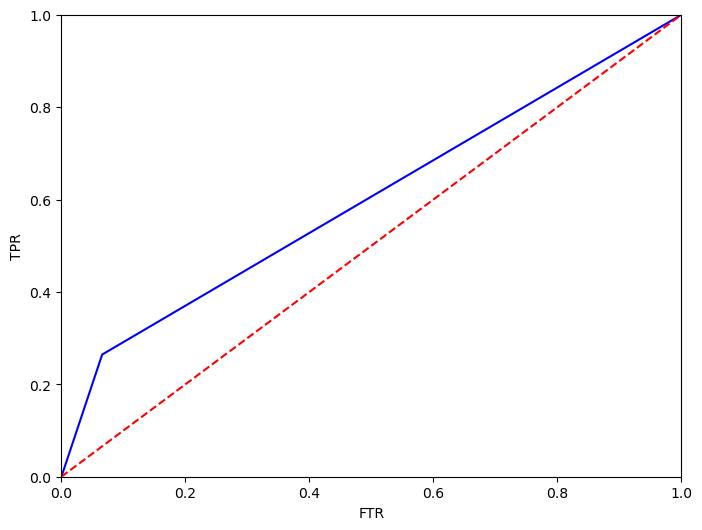

In [22]:
#logit regression
from sklearn.linear_model import LogisticRegression 

model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(X_train, y_train)

print(model_lr.coef_)
print(model_lr.intercept_)

y_lr_pred=model_lr.predict(X_test)
res_output(y_test,y_lr_pred)

In [23]:
#GridSearch for LR
from sklearn.model_selection import GridSearchCV

cv_lr_param={
    'solver':['newton-cg','lbfgs','sag'],
    'max_iter':[10000]
}
cv_lrmodel = GridSearchCV(LogisticRegression(), param_grid=cv_lr_param, scoring='f1')
cv_lrmodel.fit(X_train1,y_train1)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [10000],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             scoring='f1')

{'max_iter': 10000, 'solver': 'lbfgs'}
0.3182284465608139
Confusion Matrix:
[[1644   81]
 [ 285   84]] 

Accaracy:82.5215%
Precsion:50.9091%
Recall:22.7642%
F1:31.4607%
AUC:59.0343%


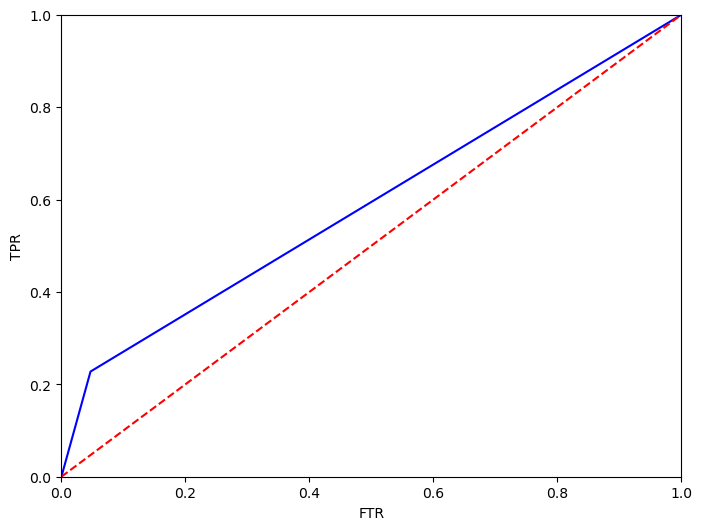

In [24]:
print(cv_lrmodel.best_params_)
print(cv_lrmodel.best_score_)
y_lr_valpred = cv_lrmodel.predict(X_val)
res_output(y_val, y_lr_valpred)

In [25]:
res_compare(y_test, y_lr_pred, y_val, y_lr_valpred)

              model  Accuracy  Precision    Recall        F1       AUC
0          Original  0.826289   0.435897  0.264444  0.329184  0.599344
1  After GridSearch  0.825215   0.509091  0.227642  0.314607  0.590343


|--- satisfaction_level <= 0.47
|   |--- satisfaction_level <= 0.11
|   |   |--- class: 1
|   |--- satisfaction_level >  0.11
|   |   |--- number_project <= 2.50
|   |   |   |--- last_evaluation <= 0.57
|   |   |   |   |--- last_evaluation <= 0.44
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- last_evaluation >  0.44
|   |   |   |   |   |--- class: 1
|   |   |   |--- last_evaluation >  0.57
|   |   |   |   |--- average_monthly_hours <= 279.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- average_monthly_hours >  279.00
|   |   |   |   |   |--- class: 1
|   |   |--- number_project >  2.50
|   |   |   |--- average_monthly_hours <= 290.00
|   |   |   |   |--- number_project <= 6.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- number_project >  6.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- average_monthly_hours >  290.00
|   |   |   |   |--- class: 1
|--- satisfaction_level >  0.47
|   |--- tenure <= 4.50
|   |   |--- number_project <= 5.50
|   |   |   

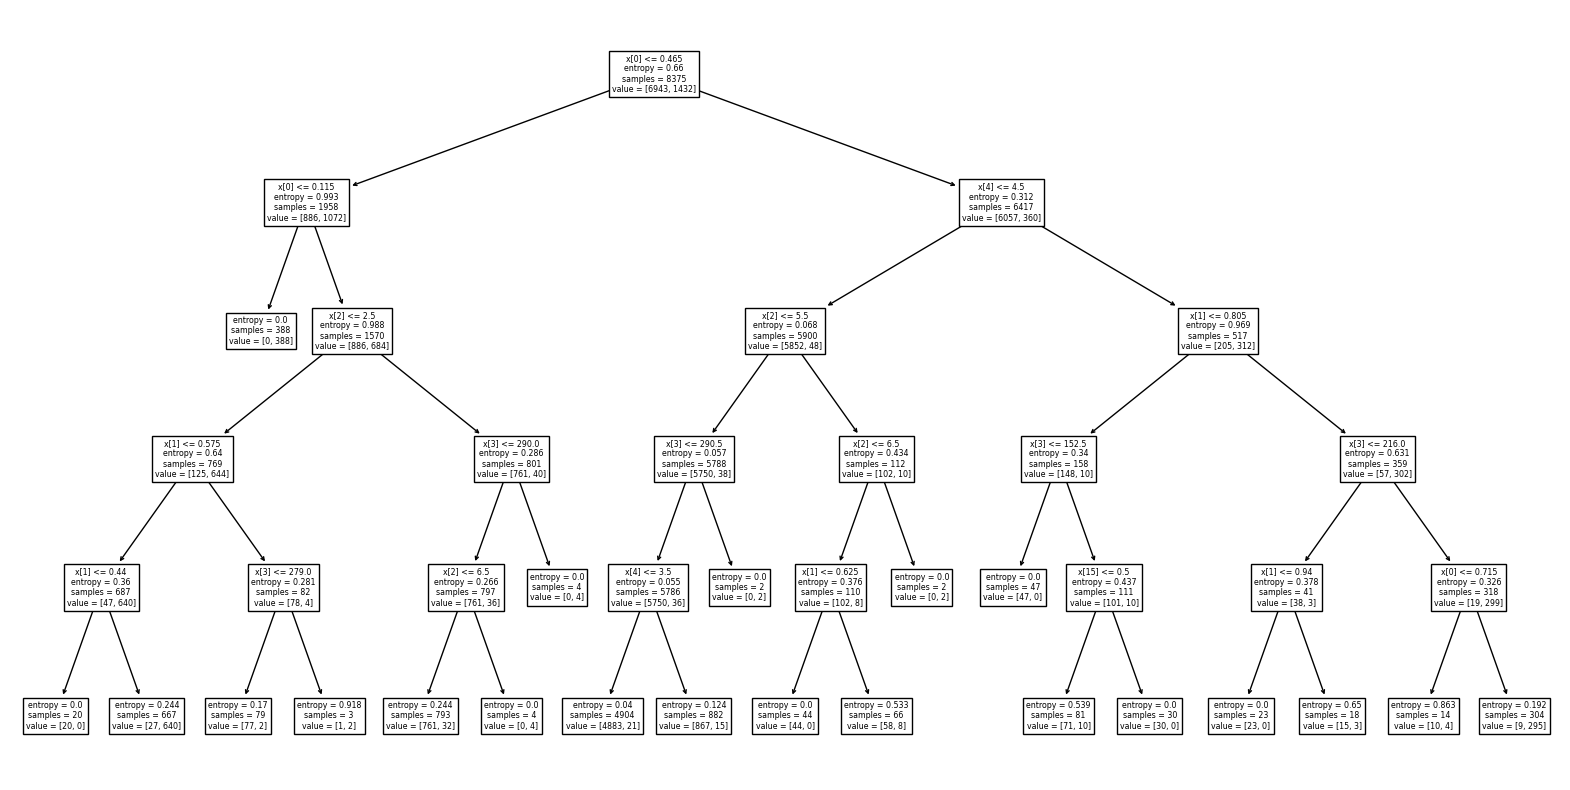

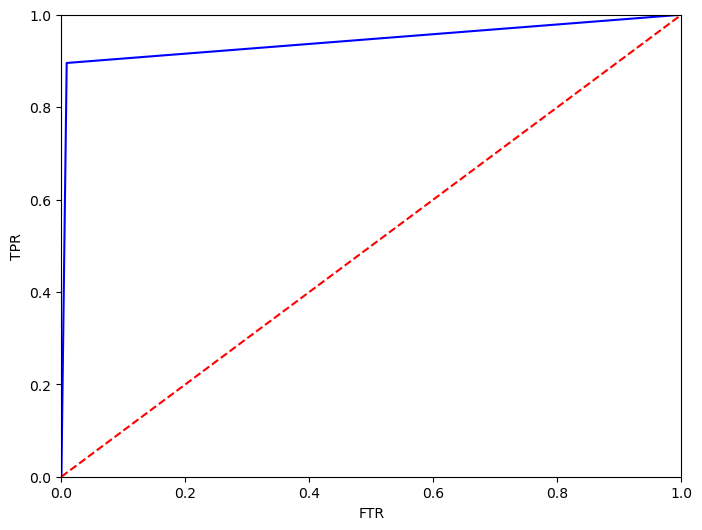

In [26]:
#Decisiong tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

model_dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, min_samples_split=2, min_samples_leaf=1)
model_dt.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(model_dt)

f_names = list(X.columns)
print(export_text(model_dt,feature_names=f_names))

y_dt_pred=model_dt.predict(X_test)
res_output(y_test, y_dt_pred)

In [27]:
#GridSearch for DT
cv_dt_param={
   # 'criterion':['entropy', 'GINI'],
    'max_depth':[5,8], 
    'min_samples_split':[5,8],
    'min_samples_leaf':[3,5]
}
cv_dtmodel = GridSearchCV(DecisionTreeClassifier(), param_grid=cv_dt_param, scoring='f1')
cv_dtmodel.fit(X_train1,y_train1)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 8], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 8]},
             scoring='f1')

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 8}
0.9504281130001815
Confusion Matrix:
[[1720    5]
 [  23  346]] 

Accaracy:98.6628%
Precsion:98.5755%
Recall:93.7669%
F1:96.1111%
AUC:96.7385%


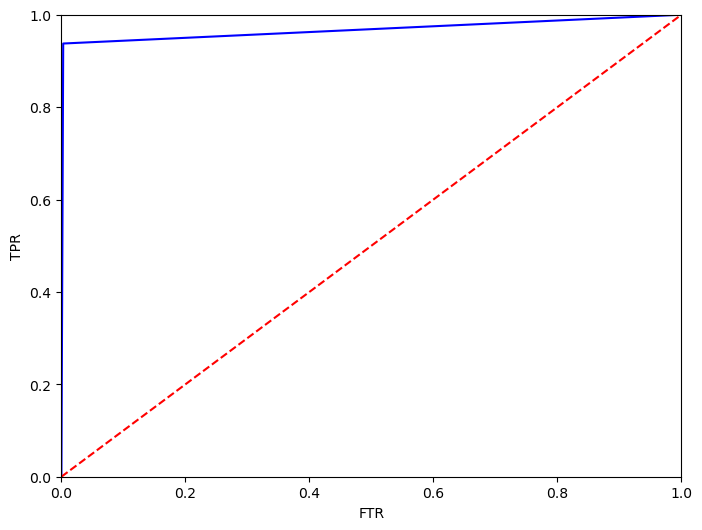

In [28]:
print(cv_dtmodel.best_params_)
print(cv_dtmodel.best_score_)
y_dt_valpred = cv_dtmodel.predict(X_val)
res_output(y_val, y_dt_valpred)

In [29]:
res_compare(y_test, y_dt_pred, y_val, y_dt_valpred)

              model  Accuracy  Precision    Recall        F1       AUC
0          Original  0.976003   0.952719  0.895556  0.923253  0.943508
1  After GridSearch  0.986628   0.985755  0.937669  0.961111  0.967385


Confusion Matrix:
[[2333    9]
 [  55  395]] 

Accaracy:97.7077%
Precsion:97.7723%
Recall:87.7778%
F1:92.5059%
AUC:93.6967%


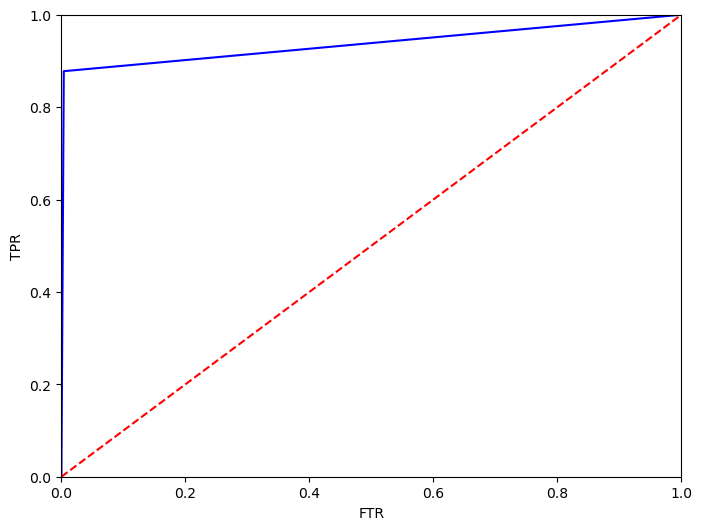

In [30]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_rf_pred=model_rf.predict(X_test)
res_output(y_test,y_rf_pred)

In [31]:
#GridSearch for DT
cv_rf_param={
    'n_estimators':[50,100,200],
    #'criterion':['entropy', 'GINI'],
    'max_depth':[5,8], 
    'min_samples_split':[5,8],
    'min_samples_leaf':[3,5]
}
cv_rfmodel = GridSearchCV(RandomForestClassifier(), param_grid=cv_rf_param, scoring='f1')
cv_rfmodel.fit(X_train1,y_train1)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 8],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200}
0.9503236547186598
Confusion Matrix:
[[1722    3]
 [  25  344]] 

Accaracy:98.6628%
Precsion:99.1354%
Recall:93.2249%
F1:96.0894%
AUC:96.5255%


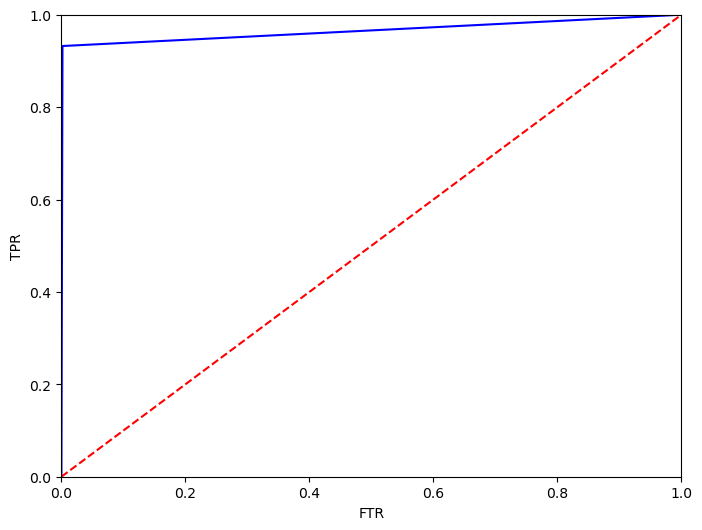

In [32]:
print(cv_rfmodel.best_params_)
print(cv_rfmodel.best_score_)
y_rf_valpred = cv_rfmodel.predict(X_val)
res_output(y_val, y_rf_valpred)

In [33]:
res_compare(y_test, y_rf_pred, y_val, y_rf_valpred)

              model  Accuracy  Precision    Recall        F1       AUC
0          Original  0.977077   0.977723  0.877778  0.925059  0.936967
1  After GridSearch  0.986628   0.991354  0.932249  0.960894  0.965255


Confusion Matrix:
[[2327   15]
 [  50  400]] 

Accaracy:97.6719%
Precsion:96.3855%
Recall:88.8889%
F1:92.4855%
AUC:94.1242%


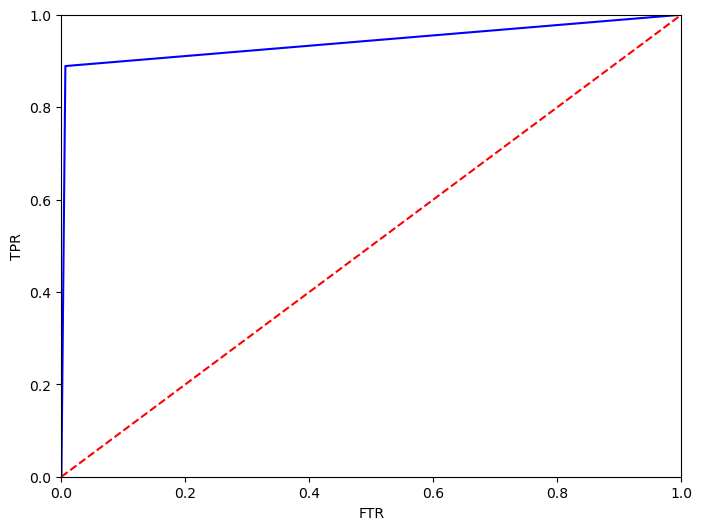

In [34]:
#XGBoost
from xgboost import XGBClassifier,plot_importance

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_xgb_pred=model_xgb.predict(X_test)
res_output(y_test,y_xgb_pred)


In [35]:
#GridSearch for XGB
cv_xgb_param={
    'max_depth': [4, 6],
    'min_child_weight': [3, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [5,10,15],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}
cv_xgbmodel = GridSearchCV(XGBClassifier(), param_grid=cv_xgb_param, scoring='f1')
cv_xgbmodel.fit(X_train1,y_train1)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             scoring='f1')

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 15, 'subsample': 0.7}
0.9494114377221272
Confusion Matrix:
[[1720    5]
 [  27  342]] 

Accaracy:98.4718%
Precsion:98.5591%
Recall:92.6829%
F1:95.5307%
AUC:96.1965%


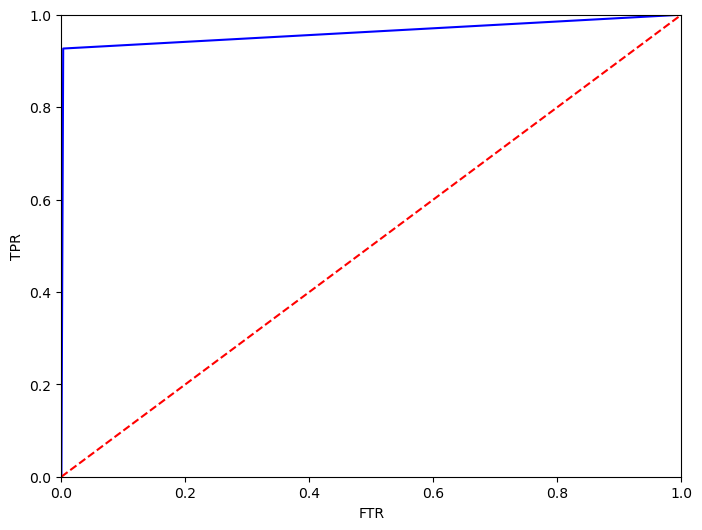

In [36]:
print(cv_xgbmodel.best_params_)
print(cv_xgbmodel.best_score_)
y_xgb_valpred = cv_xgbmodel.predict(X_val)
res_output(y_val, y_xgb_valpred)

In [37]:
res_compare(y_test, y_xgb_pred, y_val, y_xgb_valpred)

              model  Accuracy  Precision    Recall        F1       AUC
0          Original  0.976719   0.963855  0.888889  0.924855  0.941242
1  After GridSearch  0.984718   0.985591  0.926829  0.955307  0.961965


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

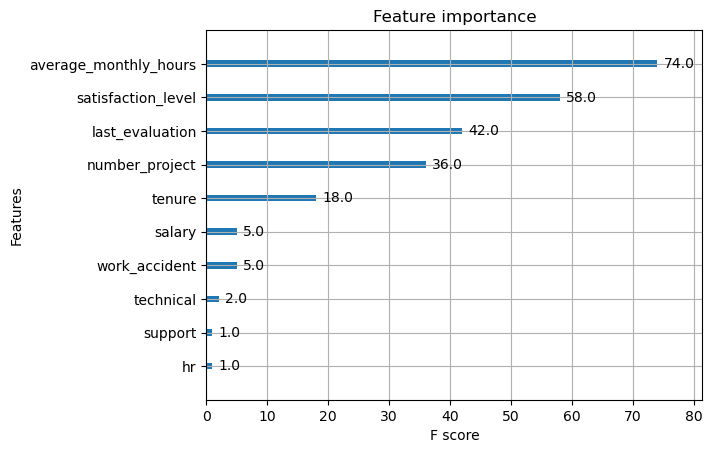

In [38]:
plot_importance(cv_xgbmodel.best_estimator_)

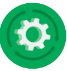
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- What business recommendations do you propose based on the models built?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



<font color=Blue>
1 'average_monthly_hours' ,'satisfaction_levle', 'last_evaluation', 'number_projects','average_monthly_hours' and 'tenure' are important factors for an employee to decide whether to leave or not, but they are not simply linear relationships. These decision paths can be followed by tree-based models. Meanwhile, employees in HR and R&D departments have the highest and lowest leave rates, respectively. <br>
    <br>
2 3 5 6 There are several local peaks on the distribution curves of 'satisfaction_levle', 'last_evaluation' and 'average_monthly_hours'. Some surveys need to be performed on the employees at these peaks to know the reasons they leave. Employees with a 'tenure' of 5 years have an apparently high leave rate. It also needs to be examined carefully.<br>
    <br>
4 I hope they can be improved by methods like: more data to get more comprehensive information about employees, some non-linear models, etc.<br>
    <br>
7 I have checked resources about grid parameter search and Sklearn built-in models.<br>
    https://scikit-learn.org/stable/index.html<br>
    <br>
8 The privacy of the data and the consequences of the predicted classification results. <br> 
    <br>
</font>

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

<font color=Blue>
1 'average_monthly_hours' is of the highest feature importance according to XBG models. It has better to be around 190 hours.
2 The 'satisfaction_level' is of the 2nd highest feature importance. If an employee gets a score of 0, 0.4, or 0.8, he/she has a comparatively much higher probability of leaving.<br>
    <br>
2 The 'number_of_projects' will be limited between 2 and 6, otherwise it will lead to a much higher leaving rate.<br>
    <br>
3 Employees with a 'tenure' nearing 5 years also have an obviously high leaving rate.<br>
    <br>
4 The 'average_monthly_hours' have to be around 200, less or more will result in a higher leaving rate.<br>
<br>
</font>

### Conclusion, Recommendations, Next Steps

<font color=Blue>
Some attributes have been found to be important factors to predict whether an employee will leave or not.<br>
The 'satisfaction_levle' and 'last_evaluation' columns are of highest feature importance. Since they are all subjective evaluations, it requires iterative optimisations.<br>
Next steps for administration, my suggestion is to perform more investigations on the reasons why these distribution curves lay out. For model optimisation, my suggestion is to try some new models.<br>
</font>